# Qiskit Tutorial 11 - Matrizes de Densidade (ATUALIZADO 14/10)

Referências https://qiskit.org/documentation/stubs/qiskit.quantum_info.DensityMatrix.html

In [1]:
from qiskit import *
%matplotlib inline
import numpy as np

In [2]:
# Podemos encontrar o operador de densidade de estados

# Para isso vamos primeiramente usar o statevector_simulator para encontrar o vetor de 
# estado desejado

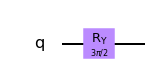

In [3]:
qc = QuantumCircuit(1)
qc.ry(3*np.pi/2,0)
qc.draw(output='mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc,backend)

In [5]:
result = job.result()
statevector = result.get_statevector(qc, decimals = 3)

In [6]:
# Aqui está o nosso vetor de estado
print(statevector)

[ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]


In [7]:
# Agora para encontrar o seu operador de densidade
from qiskit.quantum_info import *
op_densidade = DensityMatrix(statevector)

In [8]:
print(op_densidade.data)

[[ 0.5+0.000000e+00j -0.5-6.123234e-17j]
 [-0.5+6.123234e-17j  0.5+0.000000e+00j]]


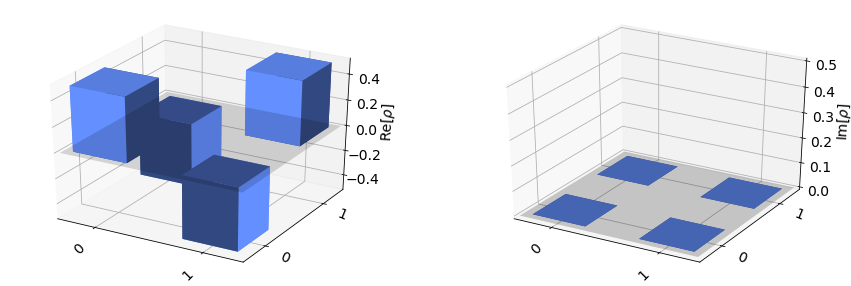

In [9]:
# É possível também visualizar a matriz de densidade por meio de um histograma

from qiskit.visualization import plot_state_city

plot_state_city(statevector)

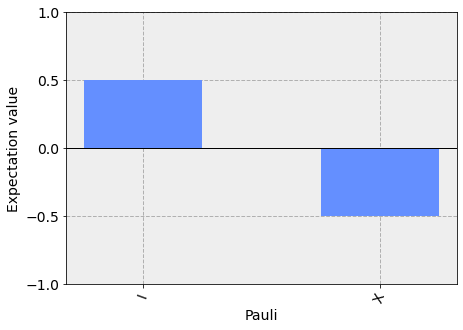

In [10]:
# Também é possivel visualizar as matrizes de Pauli que compõem o seu operador de densidade

from qiskit.tools.visualization import plot_state_paulivec

plot_state_paulivec(statevector)

## Propriedades

### Matrizes de densidade possuem traço unitário

In [11]:
# Podemos ver o traço do nosso operador
op_densidade.trace()

(1+0j)

### Matrizes de densidade são positivas semi-definidas

In [12]:
estado = [np.sqrt(2),np.sqrt(2)]
print(np.inner(np.inner(estado, op_densidade.data), estado))

0j


### tr($\rho^2$) $\leq$ 1

In [13]:
rho_2 = np.matmul(op_densidade.data,op_densidade.data)
trace = rho_2.trace()
print(trace)

(1+0j)


### Estado puro pertence a "casca" da esfera de bloch

In [14]:
def bloch_vector(op):
    pauli_x = [[0,1],[1,0]]
    pauli_y = [[0,-1j],[1j,0]]
    pauli_z = [[1,0],[0,-1]]
    
    x = np.matmul(op,pauli_x).trace()
    y = np.matmul(op,pauli_y).trace()
    z = np.matmul(op,pauli_z).trace()
    
    return [np.absolute(x),np.absolute(y),np.absolute(z)]

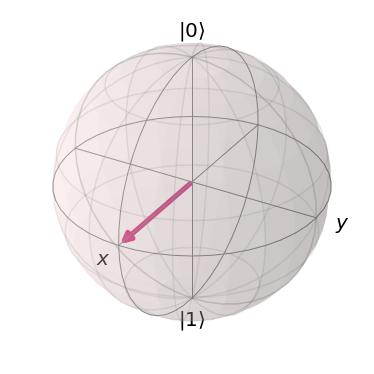

In [15]:
from qiskit.tools.visualization import plot_bloch_vector

plot_bloch_vector(bloch_vector(op_densidade.data))

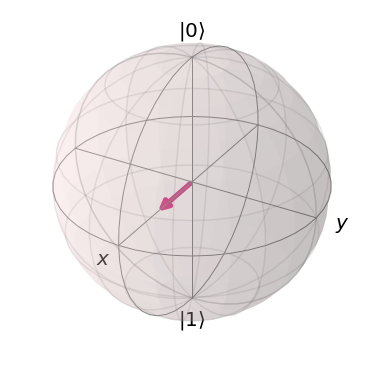

In [16]:
# Exemplo de estado misto:


estado_misto = [[0.5, 0.25],[0.25,0.5]]
plot_bloch_vector(bloch_vector(estado_misto))